In [59]:
import types
import pandas as pd


df_sfo_neigh = pd.read_csv('sfo_neighbourhoods_new1.csv')
df_sfo_neigh.head()


,Postal_Code,Neighborhood
0,94102,Hayes Valley
1,94103,South of Market
2,94107,Potrero Hill
3,94108,Chinatown
4,94109,Russian Hill


In [60]:
df_sfo_neigh['Postal_Code'] = df_sfo_neigh['Postal_Code'].astype('str')

In [61]:
df_sfo_neigh.dtypes

Postal_Code     object
Neighborhood    object
dtype: object

In [62]:
df_sfo_rest = pd.read_csv('restaurant-scores-lives-standard.csv')

In [63]:
df_sfo_rest.rename(columns={'business_postal_code':'Postal_Code'}, inplace=True)
df_sfo_rest.head()

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
2,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk
4,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,NaN,NaN,NaN,NaN,96024_20181108,2018-11-08T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN


In [64]:
df_check = df_sfo_rest

In [65]:
df_check['business_latitude'] = df_check['business_latitude'].fillna(df_check.groupby('Postal_Code')['business_latitude'].transform('mean'))
df_check['business_latitude'] = df_check['business_latitude'].fillna(df_check['business_latitude'].mean())

df_check['business_longitude'] = df_check['business_longitude'].fillna(df_check.groupby('Postal_Code')['business_longitude'].transform('mean'))
df_check['business_longitude'] = df_check['business_longitude'].fillna(df_check['business_longitude'].mean())

In [66]:
#df_sfo_rest['business_id'] = df_sfo_rest['business_id'].astype('str')
#df_sfo_rest['business_latitude'] = df_sfo_rest['business_latitude'].astype('str')
#df_sfo_rest['business_longitude'] = df_sfo_rest['business_longitude'].astype('str')
#df_sfo_rest['business_phone_number'] = df_sfo_rest['business_phone_number'].astype('str')
#df_sfo_rest['inspection_score'] = df_sfo_rest['inspection_score'].astype('str')

In [67]:
df_sfo_rest.dtypes

business_id                int64
business_name             object
business_address          object
business_city             object
business_state            object
Postal_Code               object
business_latitude        float64
business_longitude       float64
business_location         object
business_phone_number    float64
inspection_id             object
inspection_date           object
inspection_score         float64
inspection_type           object
violation_id              object
violation_description     object
risk_category             object
dtype: object

In [68]:
df_sfo_neigh.dtypes

Postal_Code     object
Neighborhood    object
dtype: object

In [69]:
df_merged_sfo = pd.merge(df_check, df_sfo_neigh, on='Postal_Code', how='left')

In [70]:
df_merged_sfo.head(10)

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.782138,-122.462649,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,Inner Richmond
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,37.792761,-122.406466,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,Chinatown
2,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,37.721166,-122.440148,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN,Crocker Amazon
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,37.783009,-122.414554,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,Hayes Valley
4,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,37.759559,-122.432392,NaN,NaN,96024_20181108,2018-11-08T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN,Castro
5,97503,Moscone South Main Kitchen,747 Howard St,San Francisco,CA,94103,37.775161,-122.411068,NaN,NaN,97503_20180911,2018-09-11T00:00:00.000,NaN,New Ownership,NaN,NaN,NaN,South of Market
6,97830,CHARLES CHOCOLATES,2650 18th St,San Francisco,CA,94110,37.753023,-122.417862,NaN,1.415566e+10,97830_20181128,2018-11-28T00:00:00.000,NaN,New Construction,NaN,NaN,NaN,Outer Mission
7,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,37.788154,-122.397855,NaN,1.415046e+10,97748_20180821,2018-08-21T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN
8,77901,"The Estate Kitchen, LLC",799 Bryant St,San Francisco,CA,94107,37.774317,-122.396536,NaN,NaN,77901_20180416,2018-04-16T00:00:00.000,86.0,Routine - Unscheduled,77901_20180416_103139,Improper food storage,Low Risk,Potrero Hill
9,87782,Beloved Cafe,3338 24th St,San Francisco,CA,94110,37.753023,-122.417862,NaN,1.415554e+10,87782_20180502,2018-05-02T00:00:00.000,96.0,Routine - Unscheduled,87782_20180502_103161,Low risk vermin infestation,Low Risk,Outer Mission


In [71]:
df_merged_sfo.shape

(53620, 18)

In [72]:
df_merged_sfo = df_merged_sfo.drop('business_location', 1)

In [73]:
df_merged_sfo = df_merged_sfo.drop('business_phone_number', 1)

In [74]:
df_merged_sfo.head(10)

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.782138,-122.462649,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,Inner Richmond
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,37.792761,-122.406466,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,Chinatown
2,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,37.721166,-122.440148,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN,Crocker Amazon
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,37.783009,-122.414554,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,Hayes Valley
4,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,37.759559,-122.432392,96024_20181108,2018-11-08T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN,Castro
5,97503,Moscone South Main Kitchen,747 Howard St,San Francisco,CA,94103,37.775161,-122.411068,97503_20180911,2018-09-11T00:00:00.000,NaN,New Ownership,NaN,NaN,NaN,South of Market
6,97830,CHARLES CHOCOLATES,2650 18th St,San Francisco,CA,94110,37.753023,-122.417862,97830_20181128,2018-11-28T00:00:00.000,NaN,New Construction,NaN,NaN,NaN,Outer Mission
7,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,37.788154,-122.397855,97748_20180821,2018-08-21T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN
8,77901,"The Estate Kitchen, LLC",799 Bryant St,San Francisco,CA,94107,37.774317,-122.396536,77901_20180416,2018-04-16T00:00:00.000,86.0,Routine - Unscheduled,77901_20180416_103139,Improper food storage,Low Risk,Potrero Hill
9,87782,Beloved Cafe,3338 24th St,San Francisco,CA,94110,37.753023,-122.417862,87782_20180502,2018-05-02T00:00:00.000,96.0,Routine - Unscheduled,87782_20180502_103161,Low risk vermin infestation,Low Risk,Outer Mission


In [75]:
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


In [76]:
address = 'San Francisco, CA'

geolocator = Nominatim(user_agent="sfo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of SFO using latitude and longitude values
map_sfo = folium.Map(location=[latitude, longitude], zoom_start=12)
map_sfo

In [77]:
df_merged_sfo.head(10)

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.782138,-122.462649,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,Inner Richmond
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,37.792761,-122.406466,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,Chinatown
2,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,37.721166,-122.440148,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN,Crocker Amazon
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,37.783009,-122.414554,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,Hayes Valley
4,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,37.759559,-122.432392,96024_20181108,2018-11-08T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN,Castro
5,97503,Moscone South Main Kitchen,747 Howard St,San Francisco,CA,94103,37.775161,-122.411068,97503_20180911,2018-09-11T00:00:00.000,NaN,New Ownership,NaN,NaN,NaN,South of Market
6,97830,CHARLES CHOCOLATES,2650 18th St,San Francisco,CA,94110,37.753023,-122.417862,97830_20181128,2018-11-28T00:00:00.000,NaN,New Construction,NaN,NaN,NaN,Outer Mission
7,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,37.788154,-122.397855,97748_20180821,2018-08-21T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN
8,77901,"The Estate Kitchen, LLC",799 Bryant St,San Francisco,CA,94107,37.774317,-122.396536,77901_20180416,2018-04-16T00:00:00.000,86.0,Routine - Unscheduled,77901_20180416_103139,Improper food storage,Low Risk,Potrero Hill
9,87782,Beloved Cafe,3338 24th St,San Francisco,CA,94110,37.753023,-122.417862,87782_20180502,2018-05-02T00:00:00.000,96.0,Routine - Unscheduled,87782_20180502_103161,Low risk vermin infestation,Low Risk,Outer Mission


In [78]:
import numpy as np

In [79]:
sum(pd.isnull(df_merged_sfo['inspection_score']))

14883

In [80]:
df_backup = df_merged_sfo

In [81]:
df_merged_sfo_clean = df_merged_sfo.dropna(subset = ['inspection_score'])

In [82]:
df_merged_sfo_clean.shape

(38737, 16)

In [83]:
df_merged_sfo_clean = df_merged_sfo.dropna(subset = ['risk_category'])

In [84]:
df_merged_sfo_clean.shape

(40250, 16)

In [85]:
df_merged_sfo_clean.head(10)

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.782138,-122.462649,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,Inner Richmond
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,37.792761,-122.406466,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,Chinatown
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,37.783009,-122.414554,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,Hayes Valley
8,77901,"The Estate Kitchen, LLC",799 Bryant St,San Francisco,CA,94107,37.774317,-122.396536,77901_20180416,2018-04-16T00:00:00.000,86.0,Routine - Unscheduled,77901_20180416_103139,Improper food storage,Low Risk,Potrero Hill
9,87782,Beloved Cafe,3338 24th St,San Francisco,CA,94110,37.753023,-122.417862,87782_20180502,2018-05-02T00:00:00.000,96.0,Routine - Unscheduled,87782_20180502_103161,Low risk vermin infestation,Low Risk,Outer Mission
18,74712,Kasa Indian Eatery,1356 Polk St,San Francisco,CA,94109,37.789368,-122.419673,74712_20180820,2018-08-20T00:00:00.000,96.0,Routine - Unscheduled,74712_20180820_103129,Insufficient hot water or running water,Moderate Risk,Russian Hill
21,99397,RAMEN COCO LLC,3319 MISSION ST,San Francisco,CA,94110,37.753023,-122.417862,99397_20190318,2019-03-18T00:00:00.000,NaN,New Ownership,99397_20190318_103133,Foods not protected from contamination,Moderate Risk,Outer Mission
23,77162,Ramen Yamadaya,1728 Buchanan St,San Francisco,CA,94115,37.786216,-122.435046,77162_20181210,2018-12-10T00:00:00.000,79.0,Routine - Unscheduled,77162_20181210_103103,High risk food holding temperature,High Risk,Western Addition
26,69850,"Kabob Trolley, LLC",298 King St,San Francisco,CA,NaN,37.764268,-122.402965,69850_20180824,2018-08-24T00:00:00.000,72.0,Routine - Unscheduled,69850_20180824_103157,Food safety certificate or food handler card n...,Low Risk,NaN
32,71999,Shabu Club,951 Clement St,San Francisco,CA,94118,37.782138,-122.462649,71999_20171127,2017-11-27T00:00:00.000,NaN,Foodborne Illness Investigation,71999_20171127_103109,Unclean or unsanitary food contact surfaces,High Risk,Inner Richmond


In [86]:
df_merged_sfo_clean = df_merged_sfo_clean.dropna(subset = ['inspection_score'])

In [87]:
df_merged_sfo_clean.shape

(36736, 16)

In [88]:
df_merged_sfo_clean = df_merged_sfo_clean.dropna(subset = ['Neighborhood'])

In [89]:
df_merged_sfo_clean.shape

(32414, 16)

In [90]:
df_merged_sfo_high = df_merged_sfo_clean[df_merged_sfo_clean['risk_category'] == 'High Risk']

In [91]:
df_merged_sfo_high.shape

(4573, 16)

In [152]:
df_high_risk_backup = df_merged_sfo_high

In [153]:
df_high_risk_backup.shape

(4573, 16)

In [156]:
df_merged_sfo_high = df_merged_sfo_high.sort_values(['inspection_date']).drop_duplicates('inspection_date', keep='last')

In [157]:
df_merged_sfo_high.shape

(699, 16)

In [158]:
x1 = df_merged_sfo_high['business_latitude']
y1 = df_merged_sfo_high['business_longitude']

len(y1)

699

In [159]:
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

arr = np.column_stack((x1, y1))
arr

array([[  37.78936849, -122.41967305],
       [  37.760338  , -122.508241  ],
       [  37.790603  , -122.405038  ],
       ...,
       [  37.75302305, -122.41786185],
       [  37.764665  , -122.419558  ],
       [  37.794008  , -122.408734  ]])

In [160]:
df_backup1 = df_merged_sfo_high

In [161]:
df_backup1.head()

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
25774,74131,Deena's Market and Smoke Shop,600 O'Farrell St,San Francisco,CA,94109,37.789368,-122.419673,74131_20160909,2016-09-09T00:00:00.000,83.0,Routine - Unscheduled,74131_20160909_103114,High risk vermin infestation,High Risk,Russian Hill
42414,67075,Beachside Coffee Bar & Kitchen,4300 JUDAH St,San Francisco,CA,94122,37.760338,-122.508241,67075_20160912,2016-09-12T00:00:00.000,87.0,Routine - Unscheduled,67075_20160912_103103,High risk food holding temperature,High Risk,Outer Sunset
44304,3121,Le Central Bistro Corp,453 Bush St,San Francisco,CA,94108,37.790603,-122.405038,3121_20160913,2016-09-13T00:00:00.000,87.0,Routine - Unscheduled,3121_20160913_103103,High risk food holding temperature,High Risk,Chinatown
18615,40216,Kuishinbo,22 Peace Plaza #535,San Francisco,CA,94115,37.785018,-122.429587,40216_20160914,2016-09-14T00:00:00.000,83.0,Routine - Unscheduled,40216_20160914_103103,High risk food holding temperature,High Risk,Western Addition
50393,2854,SANRAKU,101 04th St 1/F,San Francisco,CA,94103,37.784548,-122.404190,2854_20160915,2016-09-15T00:00:00.000,82.0,Routine - Unscheduled,2854_20160915_103103,High risk food holding temperature,High Risk,South of Market


In [162]:
from folium.plugins import FastMarkerCluster

In [163]:
%%time


m= folium.Map(
    location=[np.mean(x1), np.mean(y1)],
    tiles='Cartodb Positron',
    zoom_start=5
)

FastMarkerCluster(data=list(zip(x1, y1))).add_to(m)

folium.LayerControl().add_to(m)


Wall time: 19.6 ms


In [164]:
m

In [165]:
#Kmeans
from sklearn.cluster import KMeans
x= df_merged_sfo_high[['business_latitude','business_longitude']]
x.head()

,business_latitude,business_longitude
25774,37.789368,-122.419673
42414,37.760338,-122.508241
44304,37.790603,-122.405038
18615,37.785018,-122.429587
50393,37.784548,-122.404190


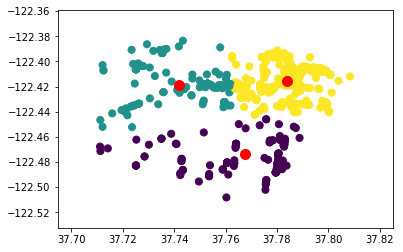

In [166]:
km = KMeans(n_clusters = 3).fit(x)
y_kmeans=km.predict(x)
plt.scatter(x['business_latitude'], x['business_longitude'], c=y_kmeans, s=50)
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1);
plt.show()

In [167]:
centers

array([[  37.76748337, -122.47389149],
       [  37.74194359, -122.41908594],
       [  37.78386242, -122.41558375]])

In [168]:
# group by neighborhood
high_risk_grouped = df_backup1.groupby('Neighborhood').count()
high_risk_grouped = pd.DataFrame(high_risk_grouped,columns=['risk_category']) # remove unneeded columns
high_risk_grouped.reset_index(inplace=True) # default index, otherwise groupby column becomes index
high_risk_grouped.rename(columns={'risk_category':'Count'}, inplace=True)
high_risk_grouped.sort_values(by='Count', inplace=True, ascending=False)
#print(sf)
high_risk_grouped.head()

,Neighborhood,Count
17,South of Market,86
11,Outer Mission,79
16,Russian Hill,61
6,Hayes Valley,53
7,Inner Richmond,52


In [169]:
high_risk_grouped

,Neighborhood,Count
17,South of Market,86
11,Outer Mission,79
16,Russian Hill,61
6,Hayes Valley,53
7,Inner Richmond,52
20,Western Addition,43
15,Potrero Hill,40
12,Outer Richmond,35
3,Chinatown,33
13,Outer Sunset,33


In [170]:
# Create map
sf_map = folium.Map(
 location=[latitude,longitude],
 zoom_start=12)

sf_map

In [131]:
sf_neigh_geo = r'SF_Find_Neighborhoods3.geojson'

In [171]:
# Use json file TEST based on class
sf_map.choropleth(
 geo_data=sf_neigh_geo,
 data=high_risk_grouped,
 columns=['Neighborhood','Count'],
 key_on='feature.properties.name',
 fill_color='YlOrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='SF neighbourhoods with HIGH risk restaurants')
# display the map
sf_map

C:\Users\turjo\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [172]:
df_om = df_merged_sfo_high[df_merged_sfo_high['Neighborhood'] == 'Outer Mission']

In [173]:
df_om.shape

(79, 16)

In [174]:
df_om.head()

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
33863,3715,WE BE SUSHI,538 Valencia St,San Francisco,CA,94110,37.764272,-122.421898,3715_20160919,2016-09-19T00:00:00.000,79.0,Routine - Unscheduled,3715_20160919_103109,Unclean or unsanitary food contact surfaces,High Risk,Outer Mission
31704,1249,KABABAYAN FAST FOOD,2706 MISSION St,San Francisco,CA,94110,37.753691,-122.418657,1249_20160926,2016-09-26T00:00:00.000,78.0,Routine - Unscheduled,1249_20160926_103103,High risk food holding temperature,High Risk,Outer Mission
9739,2356,TAQUERIA EL FAROLITO,2779 MISSION St,San Francisco,CA,94110,37.752634,-122.418486,2356_20161107,2016-11-07T00:00:00.000,93.0,Routine - Unscheduled,2356_20161107_103103,High risk food holding temperature,High Risk,Outer Mission
47661,21807,The Front Porch,65 29th St A,San Francisco,CA,94110,37.743943,-122.421988,21807_20161129,2016-11-29T00:00:00.000,93.0,Routine - Unscheduled,21807_20161129_103114,High risk vermin infestation,High Risk,Outer Mission
49836,63169,Grand Coffee,2663 Mission St,San Francisco,CA,94110,37.754383,-122.418616,63169_20161230,2016-12-30T00:00:00.000,81.0,Routine - Unscheduled,63169_20161230_103103,High risk food holding temperature,High Risk,Outer Mission


In [175]:
df_som = df_merged_sfo_high[df_merged_sfo_high['Neighborhood'] == 'South of Market']

In [176]:
df_som.shape

(86, 16)

In [177]:
df_rh = df_merged_sfo_high[df_merged_sfo_high['Neighborhood'] == 'Russian Hill']

In [178]:
df_rh.shape

(61, 16)

In [179]:
#Kmeans

omk= df_om[['business_latitude','business_longitude']]
somk = df_som[['business_latitude','business_longitude']]
rhk = df_rh[['business_latitude','business_longitude']]

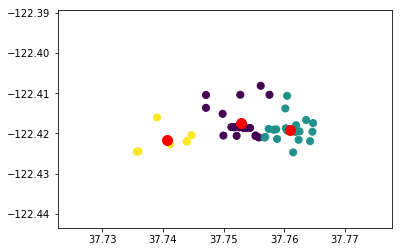

In [180]:
km_om= KMeans(n_clusters = 3).fit(omk)
y_om_kmeans=km_om.predict(omk)
plt.scatter(omk['business_latitude'], omk['business_longitude'], c=y_om_kmeans, s=50)
centers_om = km_om.cluster_centers_
plt.scatter(centers_om[:, 0], centers_om[:, 1], c='red', s=100, alpha=1);
plt.show()

In [181]:
centers_om

array([[  37.75291011, -122.41747646],
       [  37.76091338, -122.41905657],
       [  37.74064771, -122.42172129]])

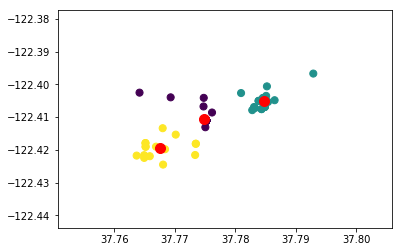

In [182]:
km_som= KMeans(n_clusters = 3).fit(somk)
y_som_kmeans=km_som.predict(somk)
plt.scatter(somk['business_latitude'], somk['business_longitude'], c=y_som_kmeans, s=50)
centers_som = km_som.cluster_centers_
plt.scatter(centers_som[:, 0], centers_som[:, 1], c='red', s=100, alpha=1);
plt.show()

In [183]:
centers_som

array([[  37.77482985, -122.41053233],
       [  37.78472663, -122.40510558],
       [  37.76758875, -122.41946337]])

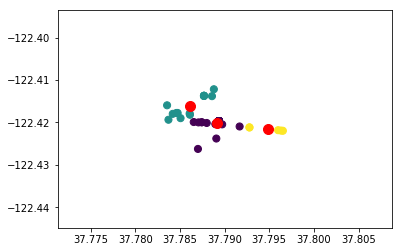

In [184]:
km_rhm= KMeans(n_clusters = 3).fit(rhk)
y_rhm_kmeans=km_rhm.predict(rhk)
plt.scatter(rhk['business_latitude'], rhk['business_longitude'], c=y_rhm_kmeans, s=50)
centers_rh = km_rhm.cluster_centers_
plt.scatter(centers_rh[:, 0], centers_rh[:, 1], c='red', s=100, alpha=1);
plt.show()

In [185]:
centers_rh

array([[  37.78910907, -122.42006323],
       [  37.78615886, -122.41604757],
       [  37.7948788 , -122.421601  ]])

In [186]:
sorted_om = df_om.sort_values('inspection_score')
sorted_om.head()

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
46193,2359,LA TRAVIATA,2854 MISSION St,San Francisco,CA,94110,37.751296,-122.418414,2359_20170706,2017-07-06T00:00:00.000,62.0,Routine - Unscheduled,2359_20170706_103112,No hot water or running water,High Risk,Outer Mission
35834,39776,Duc Loi Supermarket,2200 MISSION St,San Francisco,CA,94110,37.761637,-122.419385,39776_20180320,2018-03-20T00:00:00.000,63.0,Routine - Unscheduled,39776_20180320_103108,Contaminated or adulterated food,High Risk,Outer Mission
29662,82361,Yangtze Market,2026 Mission St,San Francisco,CA,94110,37.753023,-122.417862,82361_20170731,2017-07-31T00:00:00.000,64.0,Routine - Unscheduled,82361_20170731_103114,High risk vermin infestation,High Risk,Outer Mission
19954,39776,Duc Loi Supermarket,2200 MISSION St,San Francisco,CA,94110,37.761637,-122.419385,39776_20190422,2019-04-22T00:00:00.000,65.0,Routine - Unscheduled,39776_20190422_103114,High risk vermin infestation,High Risk,Outer Mission
15321,100752,WORLD O F NOODLE,3230 22ND ST 3234,San Francisco,CA,94110,37.753023,-122.417862,100752_20190904,2019-09-04T00:00:00.000,71.0,Routine - Unscheduled,100752_20190904_103103,High risk food holding temperature,High Risk,Outer Mission


In [187]:
sorted_som = df_som.sort_values('inspection_score')
sorted_som.head()

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
4755,76817,Lers Ros 16th Street,3189 16th St,San Francisco,CA,94103,37.775161,-122.411068,76817_20181004,2018-10-04T00:00:00.000,62.0,Routine - Unscheduled,76817_20181004_103103,High risk food holding temperature,High Risk,South of Market
22034,77548,Poc-Chuc Restaurant,2886 16th St,San Francisco,CA,94103,37.775161,-122.411068,77548_20180213,2018-02-13T00:00:00.000,65.0,Routine - Unscheduled,77548_20180213_103102,Unclean hands or improper use of gloves,High Risk,South of Market
31051,32887,Mission Beach Cafe,198 GUERRERO St,San Francisco,CA,94103,37.768035,-122.424480,32887_20190123,2019-01-23T00:00:00.000,65.0,Routine - Unscheduled,32887_20190123_103103,High risk food holding temperature,High Risk,South of Market
47140,61427,Nick's Foods,1659 MARKET St,San Francisco,CA,94103,37.773337,-122.421553,61427_20180410,2018-04-10T00:00:00.000,66.0,Routine - Unscheduled,61427_20180410_103103,High risk food holding temperature,High Risk,South of Market
25434,81759,Sally's Restaurant and Deli,300 De Haro St #332,San Francisco,CA,94103,37.775161,-122.411068,81759_20161006,2016-10-06T00:00:00.000,71.0,Routine - Unscheduled,81759_20161006_103105,Improper cooling methods,High Risk,South of Market


In [188]:
sorted_rh = df_rh.sort_values('inspection_score')
sorted_rh.head()

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
33699,67564,ITHAI,720 Post St,San Francisco,CA,94109,37.787691,-122.413717,67564_20161108,2016-11-08T00:00:00.000,59.0,Routine - Unscheduled,67564_20161108_103108,Contaminated or adulterated food,High Risk,Russian Hill
25132,76960,Jayhoon Fedaiy,1035 Geary Blvd,San Francisco,CA,94109,37.789368,-122.419673,76960_20170802,2017-08-02T00:00:00.000,64.0,Routine - Unscheduled,76960_20170802_103114,High risk vermin infestation,High Risk,Russian Hill
26119,81839,Vietnam House,642 Eddy St,San Francisco,CA,94109,37.789368,-122.419673,81839_20170817,2017-08-17T00:00:00.000,66.0,Routine - Unscheduled,81839_20170817_103114,High risk vermin infestation,High Risk,Russian Hill
33668,80591,L & G Vietnamese Sandwich,602 Eddy St,San Francisco,CA,94109,37.789368,-122.419673,80591_20170109,2017-01-09T00:00:00.000,66.0,Routine - Unscheduled,80591_20170109_103105,Improper cooling methods,High Risk,Russian Hill
6230,92844,Wok Shop Cafe,1307 Sutter St,San Francisco,CA,94109,37.789368,-122.419673,92844_20180820,2018-08-20T00:00:00.000,67.0,Routine - Unscheduled,92844_20180820_103103,High risk food holding temperature,High Risk,Russian Hill
